<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/TheThematics/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Thematic map

Last session we created a file with several layers:

In [1]:
import geopandas as gpd

linkGit='https://github.com/medina-lith/TA-1-Eva/raw/refs/heads/main/'
linkWorldMaps='worldMaps.gpkg'

we can easily find out the layers in that geopackage file (**worldMaps.gpkg**):

In [2]:
gpd.list_layers(linkGit+linkWorldMaps)

,name,geometry_type
0,rivers,MultiLineString
1,cities,Point
2,countries,MultiPolygon


For the thematics we will retrieve only one layer (map):

In [3]:
countries=gpd.read_file(linkGit+linkWorldMaps,layer='countries')

# see some
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"MULTIPOLYGON (((-69.88223 12.41111, -69.94695 ..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
3,Algeria,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"MULTIPOLYGON (((34.21807 9.96458, 34.20722 9.9..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"MULTIPOLYGON (((-68.96556 12.19889, -68.91196 ..."


As you see, the GDF above has just two colums; enough to plot a map, but no more than that.

Let me open a DF:

In [4]:
import pandas as pd

someDataLink='Net%20migration%20rate.csv'

someData=pd.read_csv(linkGit+someDataLink)

## data available
someData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 230 non-null    object 
 1   slug                 230 non-null    object 
 2    migrant(s)/1        230 non-null    float64
 3   000 population       230 non-null    int64  
 4   date_of_information  230 non-null    int64  
 5   ranking              230 non-null    object 
 6   region               0 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 12.7+ KB


## Pre Processing: Merging

In [5]:
someData.head()

,name,slug,migrant(s)/1,000 population,date_of_information,ranking,region
0,Ukraine,ukraine,36.5,2024,1,Europe,NaN
1,South Sudan,south-sudan,19.1,2024,2,Africa,NaN
2,Venezuela,venezuela,13.2,2024,3,South America,NaN
3,British Virgin Islands,british-virgin-islands,12.9,2024,4,Central America and the Caribbean,NaN
4,Cayman Islands,cayman-islands,12.1,2024,5,Central America and the Caribbean,NaN


Preparing thematic maps requires **social data** _about_ the geometry (line, polygon, point). The object **countries** has no social data, so the preprocessing requires geomerging.

### Geo Merging

This is a critical preprocessing operation, as it is in charge of combining data sets, in this case combine a DF into a GDF. Some rules are needed:

* There is at least one common column needed to serve for the matches.
* The common columns, or KEYs, need contents to be written exactly in both columns.
* It is recommended that both KEYs are named the same.

Here we have the KEYs:

In [6]:
countries.COUNTRY.head()

,COUNTRY
0,Aruba (Netherlands)
1,Antigua and Barbuda
2,Afghanistan
3,Algeria
4,Azerbaijan


In [7]:
someData.name.head()

,name
0,Ukraine
1,South Sudan
2,Venezuela
3,British Virgin Islands
4,Cayman Islands


Let's solve the _country name_ differences for the KEYs:

In [8]:
countries.rename(columns={'COUNTRY':'name'},inplace=True)

We can notice the different *case* in the KEYs. Let's work with uppercases:

In [ ]:
countries['Country']=countries.Country.str.upper()

It is very unlikely the names are written the same. Let's verify:

In [9]:
onlyDF=set(someData.name)- set(countries.name)
onlyGDF=set(countries.name)- set(someData.name)

Check here:

In [10]:
onlyDF # they did not find a match in the MAP GDF!

{'American Samoa',
 'Anguilla',
 'Aruba',
 'Bahamas, The',
 'Bermuda',
 'British Virgin Islands',
 'Burma',
 'Cabo Verde',
 'Cayman Islands',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Cook Islands',
 "Cote d'Ivoire",
 'Curacao',
 'Czechia',
 'Eswatini',
 'Faroe Islands',
 'French Polynesia',
 'Gambia, The',
 'Gaza Strip',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Guernsey',
 'Hong Kong',
 'Isle of Man',
 'Jersey',
 'Korea, North',
 'Korea, South',
 'Kosovo',
 'Macau',
 'Micronesia, Federated States of',
 'Montserrat',
 'New Caledonia',
 'North Macedonia',
 'Northern Mariana Islands',
 'Palau',
 'Paracel Islands',
 'Puerto Rico',
 'Saint Barthelemy',
 'Saint Helena, Ascension, and Tristan da Cunha',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Martin',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'Sint Maarten',
 'Svalbard',
 'Timor-Leste',
 'Tokelau',
 'Turkey (Turkiye)',
 'Turks and Caicos Islands',
 'Virgin Islands',
 'Walli

There are several countries in the DF that did not find a match in the GDF (map). Of course, most of them are in the map, let's see why they were not matched.

### Fuzzy merging

We use this technique to detect similarities between strings. You need this package **thefuzz** (based on the [Levenshtein algorithm](https://en.wikipedia.org/wiki/Levenshtein_distance)):

In [11]:
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 52.2 MB/s eta 0:00:00


This is the basic idea:

In [12]:
from thefuzz.process import extractOne as best

## find the BEST match to 'BAHAMAS (THE)'
## from all strings in 'onlyGDF'

best('Bahamas, The',onlyGDF)

('Bahamas', 90)

As you see, you get a coefficient value of 90 (the closer to 100 the better). That may be a reliable result.

Let's do the same for all the unmatched countries:

In [13]:
## for each country in onlyDF, find the BEST match in onlyGDF

[(name, best(name,onlyGDF)) for name in onlyDF]

[('Guam', ('Guam (US)', 90)),
 ('Saint Pierre and Miquelon',
  ('South Georgia and the South Sandwich Is (UK)', 86)),
 ('Anguilla', ('Anguilla (UK)', 90)),
 ('Macau', ('Macedonia', 68)),
 ('Palau', ('Palau (US)', 90)),
 ('Wallis and Futuna', ('Wallis and Futuna (France)', 95)),
 ('Bermuda', ('Bermuda (UK)', 90)),
 ('North Macedonia', ('Macedonia', 90)),
 ('Saint Barthelemy', ('Swaziland', 55)),
 ('British Virgin Islands', ('British Virgin Islands(UK)', 95)),
 ('Paracel Islands', ('Paracel Islands (China)', 95)),
 ('Isle of Man', ('Isle of Man (UK)', 95)),
 ('Curacao', ('Curacao (Netherlands)', 90)),
 ('Micronesia, Federated States of', ('Federated States of Micronesia', 95)),
 ('Guernsey', ('Guernsey (UK)', 90)),
 ('Timor-Leste', ('East Timor', 81)),
 ('Puerto Rico', ('Puerto Rico (US)', 95)),
 ('Turks and Caicos Islands', ('Turks and Caicos Islands (UK)', 95)),
 ('Jersey', ('Jersey (UK)', 90)),
 ("Cote d'Ivoire", ('Ivory Coast', 63)),
 ('Burma', ('Curacao (Netherlands)', 60)),
 ('Sain

In [14]:
#or
[(name, best(name,onlyGDF)[0],best(name,onlyGDF)[1]) for name in onlyDF]

[('Guam', 'Guam (US)', 90),
 ('Saint Pierre and Miquelon',
  'South Georgia and the South Sandwich Is (UK)',
  86),
 ('Anguilla', 'Anguilla (UK)', 90),
 ('Macau', 'Macedonia', 68),
 ('Palau', 'Palau (US)', 90),
 ('Wallis and Futuna', 'Wallis and Futuna (France)', 95),
 ('Bermuda', 'Bermuda (UK)', 90),
 ('North Macedonia', 'Macedonia', 90),
 ('Saint Barthelemy', 'Swaziland', 55),
 ('British Virgin Islands', 'British Virgin Islands(UK)', 95),
 ('Paracel Islands', 'Paracel Islands (China)', 95),
 ('Isle of Man', 'Isle of Man (UK)', 95),
 ('Curacao', 'Curacao (Netherlands)', 90),
 ('Micronesia, Federated States of', 'Federated States of Micronesia', 95),
 ('Guernsey', 'Guernsey (UK)', 90),
 ('Timor-Leste', 'East Timor', 81),
 ('Puerto Rico', 'Puerto Rico (US)', 95),
 ('Turks and Caicos Islands', 'Turks and Caicos Islands (UK)', 95),
 ('Jersey', 'Jersey (UK)', 90),
 ("Cote d'Ivoire", 'Ivory Coast', 63),
 ('Burma', 'Curacao (Netherlands)', 60),
 ('Saint Vincent and the Grenadines', 'St. Vinc

In [15]:
pd.DataFrame([(name, best(name,onlyGDF)[0],best(name,onlyGDF)[1]) for name in onlyDF])

,0,1,2
0,Guam,Guam (US),90
1,Saint Pierre and Miquelon,South Georgia and the South Sandwich Is (UK),86
2,Anguilla,Anguilla (UK),90
3,Macau,Macedonia,68
4,Palau,Palau (US),90
5,Wallis and Futuna,Wallis and Futuna (France),95
6,Bermuda,Bermuda (UK),90
7,North Macedonia,Macedonia,90
8,Saint Barthelemy,Swaziland,55
9,British Virgin Islands,British Virgin Islands(UK),95


Let's sort by the column '2' (the third):

In [16]:
pd.DataFrame([(name, best(name,onlyGDF)[0],best(name,onlyGDF)[1]) for name in onlyDF]).sort_values(by=2)

,0,1,2
48,Kosovo,Svalbard (Norway),45
51,Gaza Strip,Gambia,54
8,Saint Barthelemy,Swaziland,55
50,West Bank,Western Sahara,57
38,Eswatini,Martinique (France),60
20,Burma,Curacao (Netherlands),60
32,Sint Maarten,Myanmar,62
19,Cote d'Ivoire,Ivory Coast,63
54,Saint Martin,Antarctica,64
34,Hong Kong,Congo,68


In [18]:
countries.name[countries.name.str.contains('SWAZ|LAO|SAMOA|KORE')]

,name


Then, it makes sense to change those manually (notice the 'replace' uses Python dictionaries):

In [19]:
# this is a {dictionary}

manualChanges={'South Korea':'Korea, South','North Korea':'Korea, North',
               'St. Kitts and Nevis':'Saint Kitts and Nevis',
               'American Virgin Islands (US)':'Virgin Islands',
               'Samoa	Western':'Samoa','Macedonia':'North Macedonia',	'Svalbard (Norway)':'Kosovo',
'Gaza Strip':'Gambia',
'Swaziland':'Saint Barthelemy',
'West Bank':'Western Sahara',
'Martinique (France)':'Eswatini',
'Burma':'Curacao (Netherlands)',
'Sint Maarten':	'Myanmar',
'Saint Martin':	'Antarctica',
'Congo':'Hong Kong',
'Macau':'Macedonia',
'Czechia':	'Czech Republic',
'Saint Lucia':	'St. Lucia',
'Cabo Verde':	'Cape Verde',
'Timor-Leste':	'East Timor',
'Saint Pierre and Miquelon':	'South Georgia and the South Sandwich Is (UK)',
'Saint Helena, Ascension, and Tristan da Cunha':	'St. Kitts and Nevis',
'Bahamas, The':	'Bahamas',
              }

countries.replace(to_replace={'name':manualChanges},inplace=True)

At this stage, we should recompute the differences:

In [20]:
# updating
onlyDF=set(someData.name)- set(countries.name)
onlyGDF=set(countries.name)- set(someData.name)

An re run this code:

In [21]:
# keeping high scores

pd.DataFrame([(name, best(name,onlyGDF)[0],best(name,onlyGDF)[1]) for name in onlyDF]).sort_values(2)

,0,1,2
3,Macau,Curacao (Netherlands),54
42,Gaza Strip,Gambia,54
21,Svalbard,Cook Islands (New Zealand),55
41,West Bank,Western Sahara,57
18,Burma,Curacao (Netherlands),60
29,Sint Maarten,Myanmar,62
17,Cote d'Ivoire,Ivory Coast,63
45,Saint Martin,Antarctica,64
34,Czechia,Czech Republic,75
43,Saint Lucia,St. Lucia,80


All this is correct now!

Let's prepare the changes:

In [22]:
# new {dictionary}
changesToDF={name: best(name,onlyGDF)[0] for name in onlyDF}
changesToDF

{'Guam': 'Guam (US)',
 'Saint Pierre and Miquelon': 'South Georgia and the South Sandwich Is (UK)',
 'Anguilla': 'Anguilla (UK)',
 'Macau': 'Curacao (Netherlands)',
 'Palau': 'Palau (US)',
 'Wallis and Futuna': 'Wallis and Futuna (France)',
 'Bermuda': 'Bermuda (UK)',
 'British Virgin Islands': 'British Virgin Islands(UK)',
 'Paracel Islands': 'Paracel Islands (China)',
 'Isle of Man': 'Isle of Man (UK)',
 'Curacao': 'Curacao (Netherlands)',
 'Micronesia, Federated States of': 'Federated States of Micronesia',
 'Guernsey': 'Guernsey (UK)',
 'Timor-Leste': 'East Timor',
 'Puerto Rico': 'Puerto Rico (US)',
 'Turks and Caicos Islands': 'Turks and Caicos Islands (UK)',
 'Jersey': 'Jersey (UK)',
 "Cote d'Ivoire": 'Ivory Coast',
 'Burma': 'Curacao (Netherlands)',
 'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
 'Congo, Democratic Republic of the': 'Democratic Republic of the Congo',
 'Svalbard': 'Cook Islands (New Zealand)',
 'Bahamas, The': 'Bahamas',
 'Greenland': 'G

In [23]:
someData.replace(to_replace={'name':changesToDF},inplace=True)

What is left to match?

In [24]:
# updating
onlyDF=set(someData.name)- set(countries.name)
onlyGDF=set(countries.name)- set(someData.name)
[(name, best(name,onlyGDF)) for name in onlyDF]

[]

Once you are here, merging can proceed:

In [25]:
## GDF to the 'left'
theMapAndData=countries.merge(someData, on='name')

And our GDF has social data now!

In [26]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 230 non-null    object  
 1   geometry             230 non-null    geometry
 2   slug                 230 non-null    object  
 3    migrant(s)/1        230 non-null    float64 
 4   000 population       230 non-null    int64   
 5   date_of_information  230 non-null    int64   
 6   ranking              230 non-null    object  
 7   region               0 non-null      float64 
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 14.5+ KB


We should save this map of countries and their indicators in a new file:

In [27]:
theMapAndData.to_file("worldindicators.json")

# Thematics: the DDM (Dot Density Map)

You have a DDM if you use dot to show comparatively which polygon of a map has 'more' (or 'less') of some countable phenomenon of interest.
A dot is an aggregated value, but it is constant for each dot.

We have the world map, let's keep Africa:

In [31]:
theMapAndData.ranking.value_counts()

,count
ranking,
Africa,55
Europe,50
Central America and the Caribbean,32
Australia and Oceania,21
East and Southeast Asia,21
Middle East,16
South America,12
Central Asia,9
South Asia,8


### Preprocessing: Filtering

<Axes: >

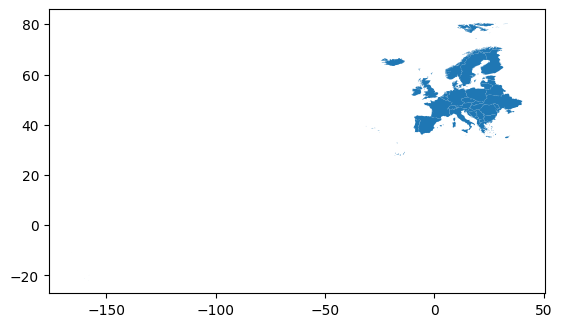

In [57]:
# then

Europa=theMapAndData[theMapAndData.ranking=='Europe']
Europa.plot()

A DDM can serve as an effective way to show the distribution of people. The most critical tasks are:

* Dot Placement: The dots should be randomly distributed within each polygon to avoid misrepresenting the data.

* Dot Unit: Deciding how many people each dot should represent is key for visual clarity. This value should be chosen carefully to avoid oversaturation or sparsity.

The size of all dots on the map must be the same to ensure a consistent visual comparison.

### Preprocessing: aggregating

This is a DOT UNIT proposal:

In [58]:
justDots=Europa.copy()
dot_value = 10
justDots['num_dots'] = (justDots[' migrant(s)/1'] / dot_value).astype(int)

### Preprocessing: distributing dots

And here, we get a location for the dots:

In [59]:
# 2. Generate the random dot locations using .sample_points()
justDots = justDots.sample_points(size=justDots['num_dots']).explode(index_parts=True)

You get this:

In [60]:
justDots

120  0     POINT (6.01787 49.69857)
130  0      POINT (7.40577 43.7368)
205  0    POINT (31.73439 46.83468)
     1    POINT (31.84148 49.64363)
     2    POINT (33.64689 49.13813)
Name: sampled_points, dtype: geometry

In [61]:
# what is it?
type(justDots)

geopandas.geoseries.GeoSeries

### Preprocessing: building GDF from GS

Notice the multi index (MI), one for a country and for a dot. As we are planing to send these points to R, we avoid MI:

In [62]:
justDots.reset_index(drop=True, inplace=True)
Europa_dots=gpd.GeoDataFrame(geometry=justDots)
Europa_dots

,geometry
0,POINT (6.01787 49.69857)
1,POINT (7.40577 43.7368)
2,POINT (31.73439 46.83468)
3,POINT (31.84148 49.64363)
4,POINT (33.64689 49.13813)


Now you have a GDF:

In [63]:
Europa_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  5 non-null      geometry
dtypes: geometry(1)
memory usage: 172.0 bytes


Juts plot the polygons as the base, and the points as the layer on top!

<Axes: >

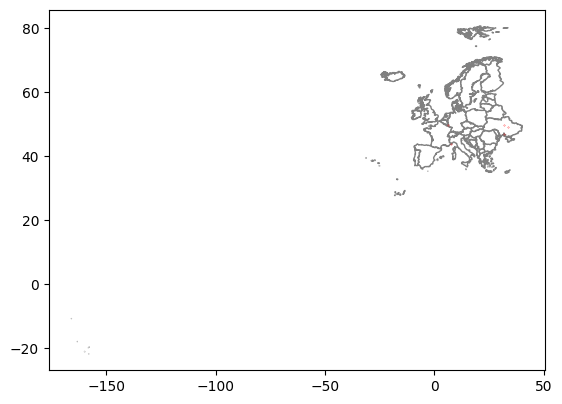

In [64]:
base=Europa.plot(facecolor="white",#color of polygon fill
               edgecolor='grey') #color of border
Europa_dots.plot(markersize=0.05, color='red',ax=base)

It is generally recommended that DDMs use an **equal-area projection**, which benefits density and limits area distortion.

<Axes: >

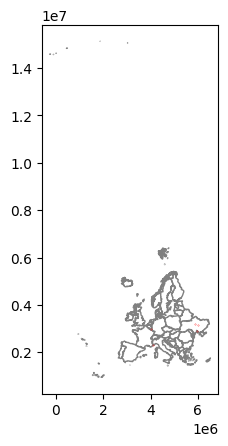

In [66]:
base=Europa.to_crs(3035).plot(facecolor="white",
                              edgecolor='grey')
Europa_dots.to_crs(3035).plot(markersize=0.05, color='red',ax=base)

Let's keep the continent countries with that crs:

In [68]:
Europa_3035=Europa.to_crs(3035)
Europa_dots_3035=Europa_dots.to_crs(3035)

# Thematics: the PSM (Proportional Symbol Map)

You have a PSM if you use a symbol (generally a circle) to show the distribution of a variable per location.
The symbol is an aggregated raw value, and its size varies according to those values. So now we need:

### Preprocessing: GDF of centroids

1. A location for a symbol, generally the polygon centroid.

In [69]:
Europa_3035_centroids = Europa_3035.copy()

# Africa_8857_centroids will have a new geometry:
Europa_3035_centroids['geometry'] = Europa_3035_centroids['geometry'].centroid

2. A size of varying values (not constant as in DDMs). Let's use population again.

In [71]:
Europa_3035_centroids['size'] = Europa_3035_centroids[' migrant(s)/1'].apply(lambda x: x**0.5/100)

## or
# import numpy as np
# Africa_8857_centroids['size'] = Africa_8857_centroids['population'].apply(lambda x: np.log10(x))

We got the basics, then:

ValueError: s must be a scalar, or float array-like with the same size as x and y

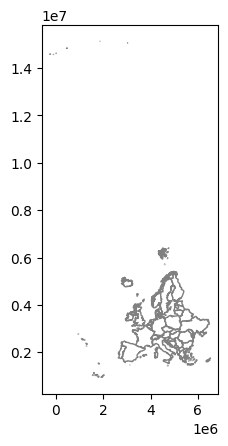

In [73]:
base=Europa_3035.plot(facecolor="white",
                      edgecolor='grey')
# Plot the centroids on top
Europa_3035_centroids.plot(
    ax=base,
    markersize=Europa_3035_centroids['size'],
    color='grey'
)

Keep in mind that the standard way of computing centroids may bring some trouble. Let´s plot Seychelles:

In [ ]:
base=Africa_8857[Africa_8857.Country=="SEYCHELLES"].explore()
Africa_8857_centroids[Africa_8857_centroids.Country=="SEYCHELLES"].explore(m=base,color="red")

A good alternative to centroids is representative_point() when dealing with complex multipolygons.

In [74]:
# replace the points
Europa_3035_centroids["geometry"]=Europa_3035.representative_point()

We will keep that last result.

In [75]:
base=Europa_3035[Europa_3035.Country=="SEYCHELLES"].explore()
Europa_3035_centroids[Europa_3035.Country=="SEYCHELLES"].explore(m=base,color="red")

AttributeError: 'GeoDataFrame' object has no attribute 'Country'

### Preprocessing: Computing new columns

PPMs are not thematic maps to see precise values, but to reveal clear differences on the variable distribution used. As, human eyes are very limited to detect area differences, we may need to use some other tactics to help uncover some patterns.

For example, let's confirm if we have outliers:

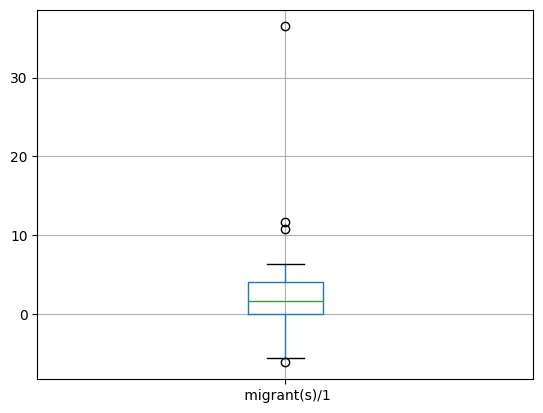

In [76]:
boxplotInfo=Europa_3035_centroids.boxplot(column=' migrant(s)/1',return_type="dict")

The object **boxplotInfo** showed the boxplot, and we confirm there are outliers. We can recover them like this:

In [77]:
outliers=boxplotInfo['fliers'][0].get_ydata()
## see
outliers

array([-6.2, 10.8, 11.7, 36.5], dtype=object)

Then, these are the outlying countries:

Knowing this information, we can create a column as outlier flag:

In [87]:
Europa_3035_centroids[' migrant(s)/1_outlier']=Europa_3035_centroids. migrant(s)/1.isin(outliers)*1

## see
Europa_3035_centroids

<>:1: SyntaxWarning: invalid decimal literal
<>:1: SyntaxWarning: invalid decimal literal
/tmp/ipython-input-1634775993.py:1: SyntaxWarning: invalid decimal literal
  Europa_3035_centroids[' migrant(s)/1_outlier']=Europa_3035_centroids. migrant(s)/1.isin(outliers)*1


SyntaxError: invalid syntax (ipython-input-1634775993.py, line 1)

We can use that like this:

KeyError: 'population_outlier'

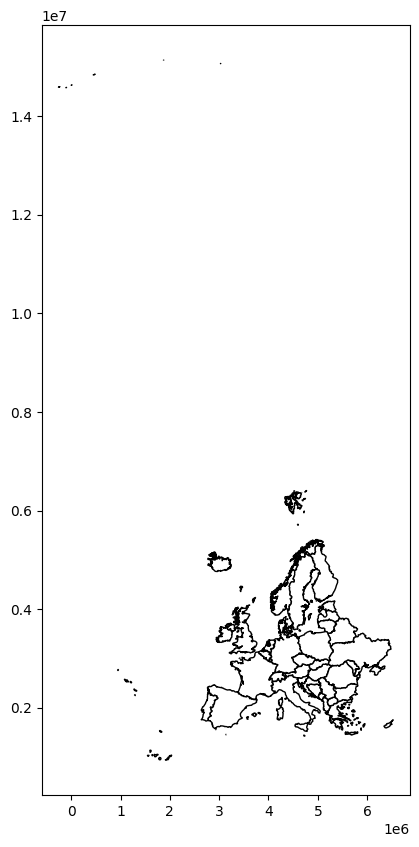

In [86]:
base = Europa_3035.plot(color='white', edgecolor='black', figsize=(10,10))

# Define your color map
mapcolor = {1: 'black', 0: 'lightgrey'}

# Plot the centroids on top
Europa_3035_centroids.plot(
    ax=base,
    markersize=Europa_3035_centroids['size'],
    color=Europa_3035_centroids['population_outlier'].map(mapcolor)
)

Here, we do a good job for outliers, but it is difficult to interprete the other ones. We could use some redundancy, but more work is needed:
1. Create two maps of centroids:

In [ ]:
# Create explicit copies of the DataFrames
Europa_3035_centroids_out = Europa_3035_centroids[Europa_3035_centroids.population_outlier==1].copy()
Africa_8857_centroids_no_out = Africa_8857_centroids[Africa_8857_centroids.population_outlier==0].copy()


2. Compute sizes in each:

In [ ]:
Africa_8857_centroids_out['size'] = Africa_8857_centroids_out['population'].apply(lambda x: x**0.5 / 50)
Africa_8857_centroids_no_out['size'] = Africa_8857_centroids_no_out['population'].apply(lambda x: x**0.5 / 50)

Now, plot the three layers, using some color gradient for the non-outliers:

NameError: name 'Europa_3035_centroids_no_out' is not defined

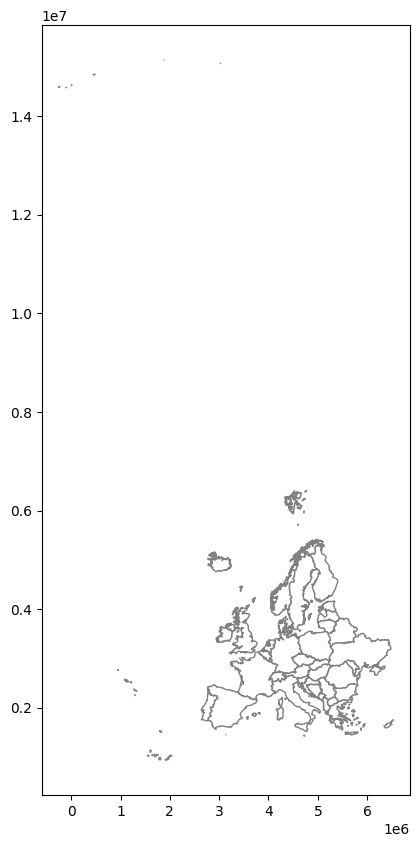

In [88]:
base=Europa_3035.plot(color='white', edgecolor='grey',figsize=(10,10))

Europa_3035_centroids_no_out.plot(
    ax=base,
    markersize=Europa_3035_centroids_no_out['size'],
    edgecolor='grey',
    c=Europa_3035_centroids_no_out['size'],
    cmap='Blues_r'
)
Europa_3035_centroids_out.plot(
    ax=base,
    markersize=Europa_3035_centroids_out['size'],
    color='orange'
)

# Thematics: Choropleths

Notice that the DDMs may use aggregated counts, and the PSMs use the variables in its original form. Choropleths will 'paint' the whole polygon and as noticed in PSMs, we have to be very careful when using color in shape, as the area itself is a confounding. To control this visual artifact, the variable must be normalized, that is, divided by a value correlated with the area.

Then, for this course, a choropleth is a normalized representation of data.

Following our definition:

* This is **NOT** a choropleth:


In [ ]:
Africa_8857.plot(Africa_8857.population)

* This **IS** a choropleth:

In [92]:
Europa_3035.plot(Europa_3035.000 population/Europa_3035.sq_km)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-1104916694.py, line 1)

Choropleths are great to represent normalized indicators such as:
* Densities
* Ratios
* Rates
* Averages

Population by area is a density indicator. This is a real number (not an integer), so most of the time the color gradient might  not be
that useful to reveal some pattern visually. Then, we often discretize (or bin) the indicator computed.

### Preprocessing: Discretizing

Now, we want to cut the variable. Run the next code to make sure you have tose packages:

In [ ]:
## do you have these installed?
# ! pip show numba mapclassify numpy

We will discretize this:

In [ ]:
Africa_8857['population_density']=Africa_8857.population/Africa_8857.sq_km

Let's explore the bining algorithms:

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=Africa_8857['population_density']
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

In [ ]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [ ]:
Africa_8857['population_density_FJ5'] = fj5.yb

In [ ]:
# there you are
Africa_8857[['population_density','population_density_FJ5']].head(20)

We could create a copy of the bins to add labels:

In [ ]:
# renaming
newLabelsForLevels={0:"0_VeryLow", 1:"1_Low", 2:"2_Middle", 3:"3_High", 4:"4_VeryHigh"}

Africa_8857['population_density_FJ5_cat']=Africa_8857.loc[:,'population_density_FJ5'].replace(newLabelsForLevels)

# we have
Africa_8857[['population_density','population_density_FJ5','population_density_FJ5_cat']].head(20)

We are ready for a discrete choropleth:

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
Africa_8857.plot(column='population_density_FJ5_cat', # variable to plot
                 cmap='viridis_r', # set of colors
                 categorical=True, # can be interpreted as category
                 edgecolor='grey', # border color
                 linewidth=0.3, # width of border
                 legend=True, # need a legend?
                 ax=ax
       )

ax.set_axis_off()

# Saving

Let's save this maps for R.

In [ ]:
## Good practice to refresh your memory

## Find only GeoDataFrames in the current session
geodataframe_list = [var for var in globals() if isinstance(globals()[var], gpd.GeoDataFrame)]

print("List of GeoDataFrames in memory:")
for name in geodataframe_list:
    print(name)

These are the ones needed in R:

In [ ]:
# for choropleth and base map
Africa_8857.info()

In [ ]:
# for DDMs
Africa_dots_8857.info()

In [ ]:
# for PSMs
Africa_8857_centroids.info()

In [ ]:
# for PSMs
Africa_8857_centroids_out.info()

In [ ]:
# for PSMs
Africa_8857_centroids_no_out.info()

The file **africa_8857.gpkg** will keep all those maps as layers!

In [ ]:
Africa_8857.to_file("africa_8857.gpkg",driver='GPKG',layer='continent')
Africa_dots_8857.to_file("africa_8857.gpkg",driver='GPKG',layer='population_ddm')
Africa_8857_centroids.to_file("africa_8857.gpkg",driver='GPKG',layer='population_psm')
Africa_8857_centroids_out.to_file("africa_8857.gpkg",driver='GPKG',layer='outlier_population_psm')
Africa_8857_centroids_no_out.to_file("africa_8857.gpkg",driver='GPKG',layer='no_outlier_population_psm')